In [ ]:

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

#loading csv file from google drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path='drive/My Drive/MiniProject2'
#import dataset

df=pd.read_csv(Path+'/MP2_Data.csv')
df.head(5)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [ ]:
#deleting column that we do not need to predict grades!
df.drop('Week1_Stat0', axis = 1, inplace = True)
df.drop('Week1_Stat1', axis = 1, inplace = True)
df.drop('Week1_Stat2', axis = 1, inplace = True)
df.drop('Week1_Stat3', axis = 1, inplace = True)

df.drop('Week2_Stat0', axis = 1, inplace = True)
df.drop('Week2_Stat1', axis = 1, inplace = True)
df.drop('Week2_Stat2', axis = 1, inplace = True)
df.drop('Week2_Stat3', axis = 1, inplace = True)

df.drop('Week3_Stat0', axis = 1, inplace = True)
df.drop('Week3_Stat1', axis = 1, inplace = True)
df.drop('Week3_Stat2', axis = 1, inplace = True)
df.drop('Week3_Stat3', axis = 1, inplace = True)

df.drop('Week4_Stat0', axis = 1, inplace = True)
df.drop('Week4_Stat1', axis = 1, inplace = True)
df.drop('Week4_Stat2', axis = 1, inplace = True)
df.drop('Week4_Stat3', axis = 1, inplace = True)

df.drop('Week5_Stat0', axis = 1, inplace = True)
df.drop('Week5_Stat1', axis = 1, inplace = True)
df.drop('Week5_Stat2', axis = 1, inplace = True)
df.drop('Week5_Stat3', axis = 1, inplace = True)

df.drop('Week6_Stat0', axis = 1, inplace = True)
df.drop('Week6_Stat1', axis = 1, inplace = True)
df.drop('Week6_Stat2', axis = 1, inplace = True)
df.drop('Week6_Stat3', axis = 1, inplace = True)

df.drop('Week7_Stat0', axis = 1, inplace = True)
df.drop('Week7_Stat1', axis = 1, inplace = True)
df.drop('Week7_Stat2', axis = 1, inplace = True)
df.drop('Week7_Stat3', axis = 1, inplace = True)

df.drop('Week8_Stat0', axis = 1, inplace = True)
df.drop('Week8_Stat1', axis = 1, inplace = True)
df.drop('Week8_Stat2', axis = 1, inplace = True)
df.drop('Week8_Stat3', axis = 1, inplace = True)

df.drop('Week9_Stat0', axis = 1, inplace = True)
df.drop('Week9_Stat1', axis = 1, inplace = True)
df.drop('Week9_Stat2', axis = 1, inplace = True)
df.drop('Week9_Stat3', axis = 1, inplace = True)

df.drop('Week8_Total', axis = 1, inplace = True)


df.drop('ID', axis = 1, inplace = True)

#lets see what we got now...

df.head(5)

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,2


In [ ]:
#Let's create new column for each row. It wil assdign rows randobly for training data and test data

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .80


In [ ]:
#Creating 2 dataframes: training and test 
training_data, testing_data = df[df['is_train']==True], df[df['is_train']==False]

#Lets see how much train examples and test examples we have
print(f"Number of training: {training_data.shape[0]}")
print(f"Number. of testing: {testing_data.shape[0]}")


Number of training: 83
Number. of testing: 24


In [ ]:
#Extract features name (column name, like Week2_Quiz1', 'Week3_MP1', etc) 
features = df.columns[:9]

#Let's check them
features

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3'],
      dtype='object')

In [ ]:
# training_data['Grade'] will contain actual grades
y= training_data['Grade']


# Random forest 

In [ ]:
#Let's start with Random Forest Classificator!

#Creating a random forest classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Training model on the features and teaching the relation between them
clf.fit(training_data[features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Using the trained model to predict grades for testing set
x=clf.predict(testing_data[features])

In [ ]:
#If you want to see predicted probabilities of the first 10 observations un-comment this

#clf.predict_proba(testing_data[features])[0:10]

In [ ]:
testing_data.head(10)

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade,is_train
1,3.33,15.0,5.0,17.83,5.0,22.27,5.0,4.00,5.0,4,False
6,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0,False
14,1.67,13.0,5.0,20.00,5.0,32.61,5.0,2.50,5.0,4,False
18,5.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0,False
21,5.00,13.0,5.0,11.74,5.0,30.63,0.0,4.67,5.0,3,False
37,5.00,13.0,5.0,10.87,5.0,29.43,2.5,5.00,5.0,3,False
49,3.33,14.0,5.0,18.26,5.0,35.00,5.0,4.17,3.0,5,False
56,1.67,13.0,5.0,6.96,5.0,21.48,5.0,4.05,4.5,2,False
59,3.33,13.0,5.0,17.83,5.0,26.65,5.0,5.00,5.0,4,False
61,3.33,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0,False


In [ ]:
#predicting grades dor testing set
preds = clf.predict(testing_data[features])

In [ ]:
#Show what model predicted for 5 students
preds[0:5]

array([4, 0, 4, 0, 3])

In [ ]:
#Let's see true grades of student so we can compare 
testing_data['Grade'].head(5)

1     4
6     0
14    4
18    0
21    3
Name: Grade, dtype: int64

In [ ]:
#Creating confusion matrix to see accuracy
pd.crosstab(testing_data['Grade'], preds, rownames=['Actual Grades'], colnames=['Predicted Grades'])


Predicted Grades,0,3,4,5
Actual Grades,,,,
0,12,0,0,0
2,0,1,0,0
3,0,2,1,0
4,0,1,3,1
5,0,0,1,2


In [ ]:
#And lets see what features are influencing the final grade for the course
#and how much

feature_importances_df = pd.DataFrame(
    {"feature": list(training_data[features].columns), "importance": clf.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
5,Week7_MP3,0.312451
3,Week5_MP2,0.240285
1,Week3_MP1,0.130931
4,Week5_PR2,0.113090
7,Week4_Quiz2,0.083875
0,Week2_Quiz1,0.047818
6,Week7_PR3,0.037901
8,Week6_Quiz3,0.019309
2,Week3_PR1,0.014341


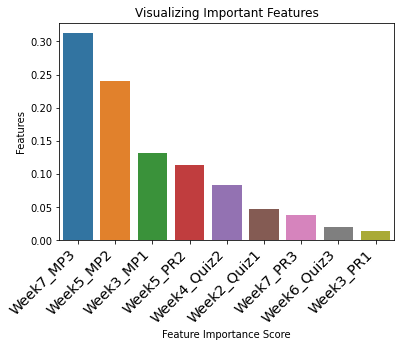

In [ ]:
#Let's visualize that information with the seaborn bar

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [ ]:
#Let's see accuracy of the model
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(testing_data['Grade'], preds)))

Model accuracy score : 0.7917


# Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

In [ ]:
#Loading the csv file from google drive
Path='drive/My Drive/MiniProject2'
df_2=pd.read_csv(Path+'/MP2_Data.csv')


In [ ]:
#delete column that we do not need 
df_2.drop('Week1_Stat0', axis = 1, inplace = True)
df_2.drop('Week1_Stat1', axis = 1, inplace = True)
df_2.drop('Week1_Stat2', axis = 1, inplace = True)
df_2.drop('Week1_Stat3', axis = 1, inplace = True)

df_2.drop('Week2_Stat0', axis = 1, inplace = True)
df_2.drop('Week2_Stat1', axis = 1, inplace = True)
df_2.drop('Week2_Stat2', axis = 1, inplace = True)
df_2.drop('Week2_Stat3', axis = 1, inplace = True)

df_2.drop('Week3_Stat0', axis = 1, inplace = True)
df_2.drop('Week3_Stat1', axis = 1, inplace = True)
df_2.drop('Week3_Stat2', axis = 1, inplace = True)
df_2.drop('Week3_Stat3', axis = 1, inplace = True)

df_2.drop('Week4_Stat0', axis = 1, inplace = True)
df_2.drop('Week4_Stat1', axis = 1, inplace = True)
df_2.drop('Week4_Stat2', axis = 1, inplace = True)
df_2.drop('Week4_Stat3', axis = 1, inplace = True)

df_2.drop('Week5_Stat0', axis = 1, inplace = True)
df_2.drop('Week5_Stat1', axis = 1, inplace = True)
df_2.drop('Week5_Stat2', axis = 1, inplace = True)
df_2.drop('Week5_Stat3', axis = 1, inplace = True)

df_2.drop('Week6_Stat0', axis = 1, inplace = True)
df_2.drop('Week6_Stat1', axis = 1, inplace = True)
df_2.drop('Week6_Stat2', axis = 1, inplace = True)
df_2.drop('Week6_Stat3', axis = 1, inplace = True)

df_2.drop('Week7_Stat0', axis = 1, inplace = True)
df_2.drop('Week7_Stat1', axis = 1, inplace = True)
df_2.drop('Week7_Stat2', axis = 1, inplace = True)
df_2.drop('Week7_Stat3', axis = 1, inplace = True)

df_2.drop('Week8_Stat0', axis = 1, inplace = True)
df_2.drop('Week8_Stat1', axis = 1, inplace = True)
df_2.drop('Week8_Stat2', axis = 1, inplace = True)
df_2.drop('Week8_Stat3', axis = 1, inplace = True)

df_2.drop('Week9_Stat0', axis = 1, inplace = True)
df_2.drop('Week9_Stat1', axis = 1, inplace = True)
df_2.drop('Week9_Stat2', axis = 1, inplace = True)
df_2.drop('Week9_Stat3', axis = 1, inplace = True)

df_2.drop('Week8_Total', axis = 1, inplace = True)


df_2.drop('ID', axis = 1, inplace = True)

#lets original dataset
df_2.head(5)

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,2


In [ ]:
#Let's create new column for overall score, earned by the student during the course.

df_2.loc[:,'Total'] = df_2.sum(axis=1)

In [ ]:
#Dropping all zeros rows to see more random result for the model
df_2.drop(df_2.tail(28).index,
        inplace = True)
 

In [ ]:
#let's see our dataset now
df_2.head(78)

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade,Total
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,4,86.97
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,4,86.43
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,3,82.44
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,3,83.65
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,2,69.68
...,...,...,...,...,...,...,...,...,...,...,...
73,2.50,14.0,5.0,18.26,5.00,28.64,0.0,3.00,5.0,4,85.40
74,5.00,15.0,5.0,19.57,5.00,34.60,5.0,5.00,5.0,5,104.17
75,4.17,11.0,5.0,18.26,4.90,31.02,5.0,5.00,4.5,4,92.85
76,5.00,15.0,5.0,17.83,5.00,28.24,5.0,4.17,5.0,4,94.24


In [ ]:
#Getting the X and Y 
grade_X=np.array(df_2['Total']).reshape((-1, 1))
grade_y=np.array(df_2['Grade'])



In [ ]:
# Spliting the data into training/testing sets
grade_X_train = grade_X[:-20]
grade_X_test = grade_X[-20:]

# Spliting the targets into training/testing sets
grade_y_train = grade_y[:-20]
grade_y_test = grade_y[-20:]




In [ ]:
# Creating linear regression object
regr = linear_model.LinearRegression()

# And, finally, training the model on training set. 
regr.fit(grade_X_train, grade_y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting grades for  testing set
grade_y_pred = regr.predict(grade_X_test)



In [ ]:
#Lets get the coefficients of the model
print('Coefficients: \n', regr.coef_)
# MSE
print('MSE: %.2f'
      % mean_squared_error(grade_y_test, grade_y_pred))
# Determination
print('Determination: %.2f'
      % r2_score(grade_y_test, grade_y_pred))



Coefficients: 
 [0.0487553]
MSE: 0.16
Determination: 0.95


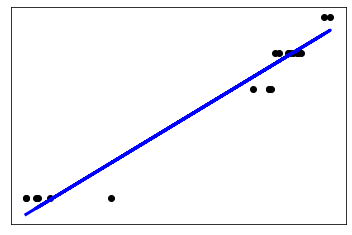

In [ ]:
#Lets see efficency on the scatter plot
plt.scatter(grade_X_test, grade_y_test,  color='black')
plt.plot(grade_X_test, grade_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Comparing two approaches

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


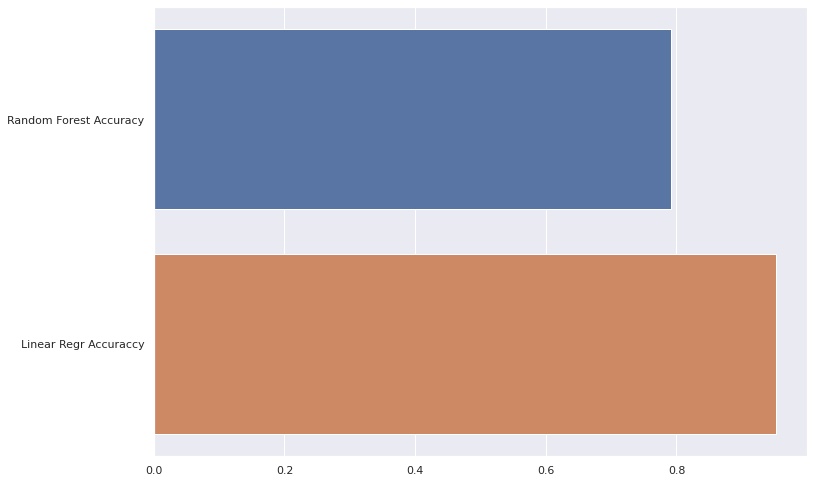

In [ ]:
#Let's compare accuracy of two approaches!

x = ['Random Forest Accuracy', 'Linear Regr Accuraccy']
y = [accuracy_score(testing_data['Grade'], preds), r2_score(grade_y_test, grade_y_pred)]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y, x)
plt.show()

As we can see, the linear regr model was more accurate.